In [26]:
# Block 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [27]:
# Block 2: Load and inspect CSV data
csv_file_path = "/home/jmframe/data/CAMELS_US/hourly/usgs_streamflow/01187300-usgs-hourly.csv"

# Read the CSV into a DataFrame, specifying the date column as the index
df_csv = pd.read_csv(csv_file_path, parse_dates=["date"], index_col="date")

# Inspect the first few rows to ensure it's loaded correctly
print(df_csv.head())

                     QObs(mm/h)  QObs count     qualifiers  utcoffset(h)  \
date                                                                       
1990-10-01 05:00:00    0.013851           1         A [91]          -4.0   
1990-10-01 06:00:00    0.013851           2  A [91]/A [91]          -4.0   
1990-10-01 07:00:00    0.013653           2  A [91]/A [91]          -4.0   
1990-10-01 08:00:00    0.013257           2  A [91]/A [91]          -4.0   
1990-10-01 09:00:00    0.012961           2  A [91]/A [91]          -4.0   

                     (iv-camels)/camels  QObs_CAMELS(mm/h)  
date                                                        
1990-10-01 05:00:00            0.006944           0.012664  
1990-10-01 06:00:00            0.006944           0.012664  
1990-10-01 07:00:00            0.006944           0.012664  
1990-10-01 08:00:00            0.006944           0.012664  
1990-10-01 09:00:00            0.006944           0.012664  


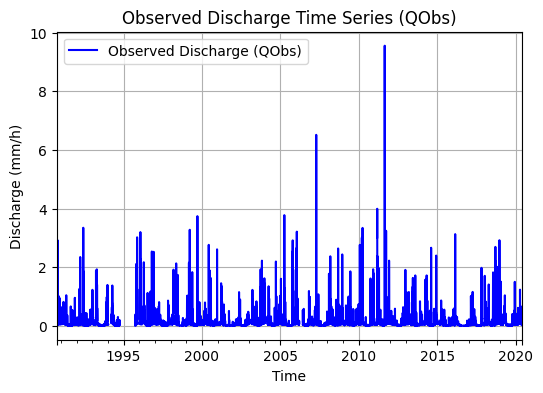

In [28]:
# Block 3: Plot the time series from CSV
plt.figure(figsize=(6, 4))

# Plot the 'QObs(mm/h)' column
df_csv["QObs(mm/h)"].plot(label='Observed Discharge (QObs)', color='blue')

# Add title, labels, and grid
plt.title("Observed Discharge Time Series (QObs)")
plt.xlabel("Time")
plt.ylabel("Discharge (mm/h)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<xarray.Dataset>
Dimensions:     (feature_id: 18917, time: 2184)
Coordinates:
  * time        (time) datetime64[ns] 2015-10-01T01:00:00 ... 2015-12-31
  * feature_id  (feature_id) int64 279 280 281 282 ... 13252 13253 13254 13255
Data variables:
    type        (feature_id) object ...
    flow        (feature_id, time) float32 ...
    velocity    (feature_id, time) float32 ...
    depth       (feature_id, time) float32 ...
    nudge       (feature_id, time) float32 ...
Attributes:
    TITLE:                OUTPUT FROM T-ROUTE
    file_reference_time:  2015-10-01_00:00:00
    code_version:         
DatetimeIndex(['2015-10-01 01:00:00', '2015-10-01 02:00:00',
               '2015-10-01 03:00:00', '2015-10-01 04:00:00',
               '2015-10-01 05:00:00', '2015-10-01 06:00:00',
               '2015-10-01 07:00:00', '2015-10-01 08:00:00',
               '2015-10-01 09:00:00', '2015-10-01 10:00:00'],
              dtype='datetime64[ns]', freq=None)


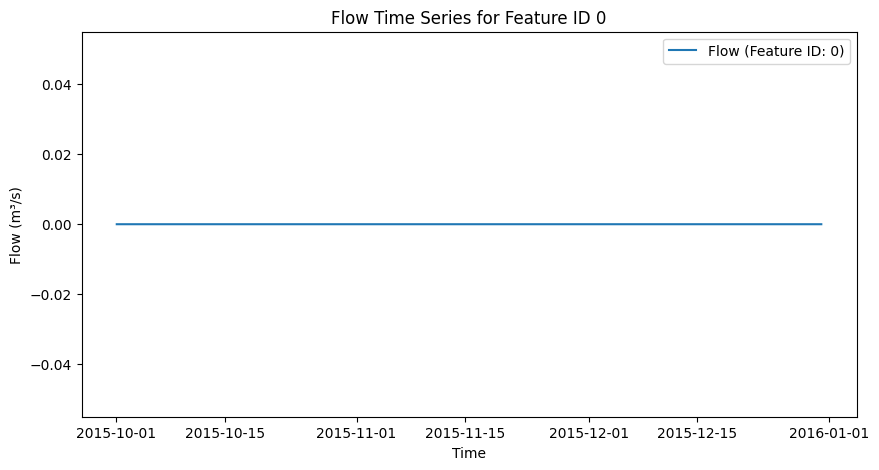

In [30]:
# Block 4: Load NetCDF data and inspect structure
import xarray as xr
import pandas as pd

nc_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/troute_output_201510010000.nc"

# Open the NetCDF dataset
ds = xr.open_dataset(nc_file_path)

# Display the dataset structure
print(ds)

# Extract the 'flow' variable and its corresponding time dimension
flow = ds["flow"]
time = ds["time"]

# If needed, convert the time values to pandas DatetimeIndex directly
time_readable = pd.to_datetime(time.values)

# Print the first few time values to verify
print(time_readable[:10])

# Optional: Plot flow for a specific feature over time
import matplotlib.pyplot as plt

# Select a specific feature_id (e.g., the first one)
feature_flow = flow.isel(feature_id=280)

# Plot the flow values over time
plt.figure(figsize=(10, 5))
plt.plot(time_readable, feature_flow, label='Flow (Feature ID: 0)')
plt.xlabel('Time')
plt.ylabel('Flow (m³/s)')
plt.title('Flow Time Series for Feature ID 0')
plt.legend()
plt.show()

In [31]:
ds.feature_id.shape

(18917,)

In [32]:
# Path to your Parquet file
parquet_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/201601010000NEXOUT.parquet"

try:
    # Load the Parquet file into a DataFrame
    df = pd.read_parquet(parquet_file_path)

    # Display the first few rows to inspect the content
    print("Preview of the Parquet File:")
    print(df.head())

    # Print summary information about the DataFrame
    print("\nDataFrame Info:")
    print(df.info())

    # Optionally, list the column names
    print("\nColumn Names:")
    print(df.columns)

except Exception as e:
    print(f"Error reading Parquet file: {e}")

Error reading Parquet file: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.


                     nex-13662  nex-13663  nex-13664  nex-13665
datetime                                                       
2015-10-01 00:00:00   0.078546   0.257726   0.380243   0.398112
2015-10-01 01:00:00   0.081023   0.267751   0.386441   0.403406
2015-10-01 02:00:00   0.086891   0.288002   0.414973   0.435741
2015-10-01 03:00:00   0.090203   0.300284   0.423816   0.443327
2015-10-01 04:00:00   0.091688   0.305811   0.430089   0.448907
                     nex-13662  nex-13663  nex-13664  nex-13665
datetime                                                       
2015-12-31 20:00:00   0.114813   0.328868   0.511374   0.546535
2015-12-31 21:00:00   0.113158   0.324853   0.505789   0.543631
2015-12-31 22:00:00   0.110732   0.317750   0.496702   0.539601
2015-12-31 23:00:00   0.109585   0.315265   0.493002   0.538363
2016-01-01 00:00:00   0.108655   0.312447   0.488614   0.533821


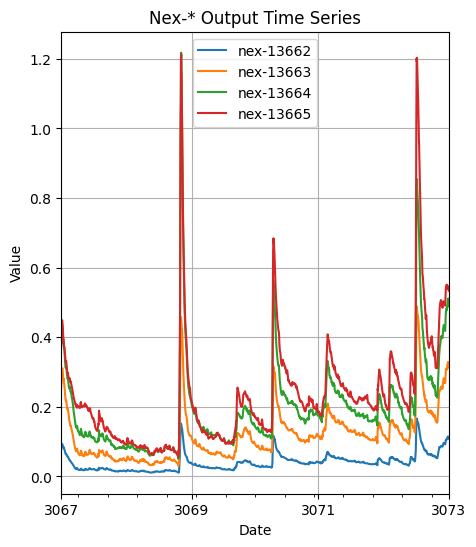

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV files and corresponding nex IDs
csv_files = [
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13662_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13663_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13664_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13665_output.csv"
]
nex_id = [13662, 13663, 13664, 13665]

# Initialize an empty DataFrame to hold the merged data
df_full = pd.DataFrame()

# Loop through each file and process it
for idx, file_path in enumerate(csv_files):
    # Read the CSV without a header
    df = pd.read_csv(file_path, header=None, names=['index', 'datetime', f'nex-{nex_id[idx]}'])

    # Convert the datetime column to a proper datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Set the datetime column as the index
    df.set_index('datetime', inplace=True)

    # Drop the index column (first column) since it's not needed anymore
    df.drop(columns=['index'], inplace=True)

    # Merge with the full DataFrame, aligning by datetime index
    if df_full.empty:
        df_full = df
    else:
        df_full = df_full.join(df, how='outer')

# Display the combined DataFrame
print(df_full.head())
print(df_full.tail())

# Plot the combined data
df_full.plot(figsize=(5, 6), grid=True)

# Add title and labels
plt.title("Nex-* Output Time Series")
plt.xlabel("Date")
plt.ylabel("Value")

# Format the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Show the plot
plt.show()

In [42]:
df_full['01187300'].max()

0.757881


NSE Scores:
          ID        NSE
0  nex-13662   0.694716
1  nex-13663  -4.781431
2  nex-13664 -21.597820
3  nex-13665 -34.996579
4   01187300  -9.704720


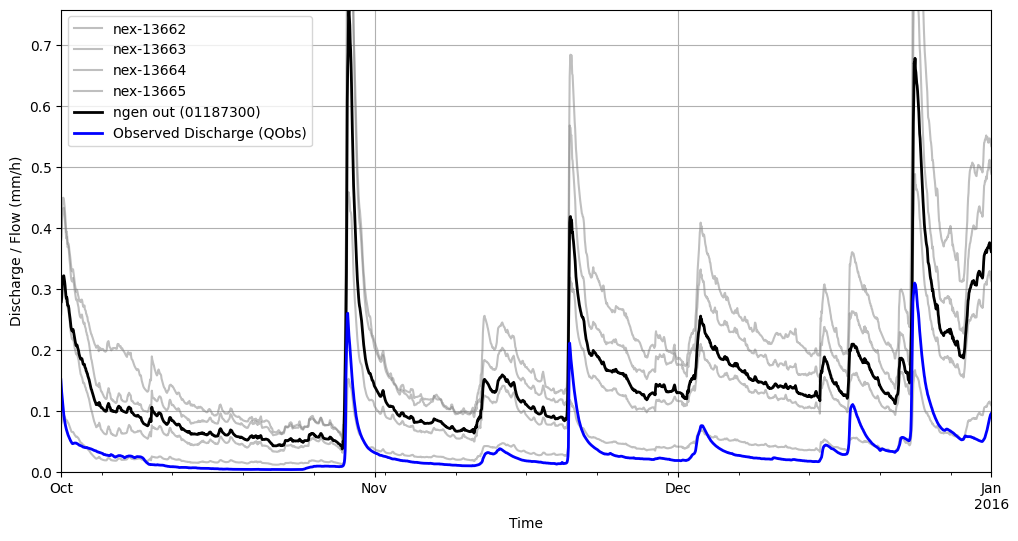

In [46]:
# Function to calculate NSE, handling missing values
def nse_score(observed, simulated):
    # Ensure matching indices
    observed, simulated = observed.align(simulated, join='inner')
    
    # Remove NaN values
    mask = ~observed.isna() & ~simulated.isna()
    observed = observed[mask]
    simulated = simulated[mask]
    
    # Calculate NSE
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - observed.mean()) ** 2)
    return 1 - (numerator / denominator) if denominator != 0 else np.nan

# List of CSV files and their IDs
csv_files = [
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13662_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13663_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13664_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13665_output.csv"
]
nex_id = [13662, 13663, 13664, 13665]

# Initialize an empty DataFrame for combined nex-* data
df_full = pd.DataFrame()

# Loop to read and merge the nex-* output files
for idx, file_path in enumerate(csv_files):
    # Read the CSV without header
    df = pd.read_csv(file_path, header=None, names=['index', 'datetime', f'nex-{nex_id[idx]}'])
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.set_index('datetime', inplace=True)
    df.drop(columns=['index'], inplace=True)

    # Merge with the full DataFrame using an outer join
    if df_full.empty:
        df_full = df
    else:
        df_full = df_full.join(df, how='outer')

# Calculate average discharge across nex-* outputs
df_full["01187300"] = df_full.mean(axis=1)

# Load observed discharge data (QObs)
csv_file_path = "/home/jmframe/data/CAMELS_US/hourly/usgs_streamflow/01187300-usgs-hourly.csv"
df_csv = pd.read_csv(csv_file_path, parse_dates=["date"], index_col="date")

# Calculate NSE for each individual nex-* output and the average discharge
nse_results = []
for col in df_full.columns:
    nse = nse_score(df_csv["QObs(mm/h)"], df_full[col])
    nse_results.append({"ID": col, "NSE": nse})

# Create a DataFrame to display NSE results
nse_df = pd.DataFrame(nse_results)
print("\nNSE Scores:")
print(nse_df)

# Plot both nex-* outputs and observed discharge
plt.figure(figsize=(12, 6))

# Plot individual nex-* outputs in grey
df_full.drop(columns=["01187300"]).plot(ax=plt.gca(), color='grey', alpha=0.5, legend=False)

# Plot average discharge in black
df_full["01187300"].plot(ax=plt.gca(), color='black', linewidth=2, label='ngen out (01187300)')

# Plot observed discharge in blue
df_csv["QObs(mm/h)"].plot(ax=plt.gca(), color='blue', linewidth=2, label='Observed Discharge (QObs)')

# Add labels, title, legend, and grid
plt.xlabel("Time")
plt.ylabel("Discharge / Flow (mm/h)")
plt.xlim(df_full.index[0], df_full.index[-1])
plt.ylim(0, df_full['01187300'].max())
plt.legend()
plt.grid(True)

# Show the plot
plt.show()